# Drug abuse in Africa

# Data understanding


## Defining the metric for success
* Our metric for success is actually finding the relationship between drug/substance abuse and mentall illness cases in Africa. 


## Specific objectives
* To identify the intensity of drug and substance abuse in Africa.
* To identify the gender most affected by mental illnesses in these countries.
* To identify the age group affected by substance use cases.
* To identify the trend in drug and substance use over the years.
* To establish a relationship between drug and substance abuse with mental illnesses in specific countries.


In [2]:
#Importing the libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
import matplotlib as mpl
mpl.rcParams['text.color'] = 'black'

this is test


## Loading the datasets for cleaning and descriptive analysis.

# Reading the Data

In [3]:
# Reading the data
Gender_drug_use=dataframe('Datasets/alcohol-or-drug-use-disorders-male-vs-female.csv')
Gender_depression=dataframe('Datasets/prevalence-of-depression-males-vs-females.csv')
Age_drug_use=dataframe('Datasets/deaths-substance-disorders-age.csv')
Drugs=dataframe('Datasets/deaths-substance-disorders.csv')
Mental_illnesses=dataframe('Datasets/number-with-mental-and-neurodevelopmental-disorders-by-type.csv')
Country_codes=dataframe('Datasets/Country_codes.csv')
African_region=dataframe('Clean datasets/African regions.csv')


### The dataset layout and naming is as follows:
1. Gender_drug_use-This contains the data that has gender with substance disorders.
2. Gender_depression-This contains the dataset that has the gender with the depressive disorders
3. Age_drug_use- This contains the dataset with the different agegroups with Prevalence to substance abuse.
4. Drugs-This contains the different drugs causing deaths
5. Mental_illnesses-This contains the mental illnesses that are prevalent in Africa
6. Country_codes-This contains the country codes in African Countries
7. African region-Has the regions in Africa.

# Tidying the datasets for analysis

### a.) Cleaning the data with Prevelance of alchohol/substance abuse in males and females

In [4]:
# Tidying the gender drug use dataset
Gender_drug_use
# Calling the function to filter out african countries in tyhe Gender drug use dataset.
Gender_drug_use_African=african_countries(Gender_drug_use,Country_codes,'Code','A 3')
# Dropping unnecessary columns
dropped_df=Gender_drug_use_African.drop(columns=['Continent'])
# Renaming the columns
Clean_gender_drug=dropped_df.rename(columns={
"Prevalence - Alcohol and substance use disorders: Male (age-standardized percent)":"Drug use among males",
"Prevalence - Alcohol and substance use disorders: Female (age-standardized percent)":"Drug use among females"},inplace=False)
Clean_gender_drug
# Checking the percentage of missing values
missing_percentage(Clean_gender_drug)
# only 0.2% of the values in the Drug use among males and females was null
# Filling the missing values with 0.00 to avoid losing the year and country data
df=Clean_gender_drug.dropna()
df.isnull().sum()
# Reseting the index to start at 0
Clean_gender_drug_df= reset_index(df)
#rechecking for null values
Clean_gender_drug_df.isnull().sum()
#Exporting the clean data 
export(Clean_gender_drug_df,'Clean datasets/Clean_gender_drug_df2.csv')

### b.) Cleaning the data with deaths caused by substance abuse among different age brackets.

In [5]:
# Tidying the Age differentiated drug use dataset
Age_drug_use
# Calling the function to filter out african countries in the Age differentiated drug use dataset.
Age_drug_use_African=african_countries(Age_drug_use,Country_codes,'Code','A 3')
Age_drug_use_African 
# Renaming the columns
Clean_Age_drug=Age_drug_use_African.rename(columns={
"Deaths - Substance use disorders - Sex: Both - Age: 70+ years (Number)":"Substance use disorder(+70 yrs)",
"Deaths - Substance use disorders - Sex: Both - Age: 50-69 years (Number)":"Substance use disorder(50-69 yrs)",
"Deaths - Substance use disorders - Sex: Both - Age: 15-49 years (Number)":"Substance use disorder(15-49 yrs)",
"Deaths - Substance use disorders - Sex: Both - Age: Under 5 (Number)":"Substance use disorder(Under 5 yrs)",
"Deaths - Substance use disorders - Sex: Both - Age: 5-14 years (Number)":"Sustance use disorder(5-14 yrs)"},inplace=False)
Clean_Age_drug
#Checking the percentage of missing values
missing_percentage(Clean_Age_drug)
# There were no missing values
#Checking the new properties
properties(Clean_Age_drug)
#Reseting the index of the new dataframe
Clean_Age_drug1=reset_index(Clean_Age_drug)
# Exporting the clean dataframe
export(Clean_Age_drug1,'Clean datasets/Clean_Age_Drug_Abuse.csv')

### c.) Cleaning the Gender differentiated dataset for depressive disorders

In [6]:
Gender_depression
# Calling the function to filter out african countries in the gender with depressive disorders
Gender_depression_African=african_countries(Gender_depression,Country_codes,'Code','A 3')
Gender_depression_African
# Dropping unnecessary columns
dropped_df1=Gender_depression_African.drop(columns=['Continent'])
dropped_df1
# # Renaming the columns
Clean_gender_depression=dropped_df1.rename(columns={
"Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)":"%_Depressive_disorders_males",
"Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)":"%_Depressive_disorders_females",
"Total population (Gapminder, HYDE & UN)":"Total_population",
},inplace=False)
Clean_gender_depression
# Checking the percentage of missing values
missing_percentage(Clean_gender_depression)
# # only 89% of the values in the depressive disorders was null
# Filling the missing values with 0.00 to avoid losing the year and country data
df1=Clean_gender_depression.dropna()
#Reseting the index to start at 0
Clean_gender_depression_df= reset_index(df1)
Clean_gender_depression_df
#rechecking for null values
Clean_gender_depression_df.isnull().sum()
#Exporting the clean data 
export(Clean_gender_depression_df,'Clean datasets/Clean_Gender_depression2.csv')

### d.) Cleaning the dataset with different form of drugs.

In [7]:
# Tidying the drug dataset
Drugs
# Calling the function to filter out african countries in the Age differentiated drug use dataset.
Drugs_Africa=african_countries(Drugs,Country_codes,'Code','A 3')
Drugs_Africa
# # Renaming the columns
Clean_drug=Drugs_Africa.rename(columns={
"Deaths - Cocaine use disorders - Sex: Both - Age: All Ages (Number)":"Death_Cocaine",
"Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)":"Death_Illicit_drugs",
"Deaths - Opioid use disorders - Sex: Both - Age: All Ages (Number)":"Death_Opioid",
"Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)":"Death_Alchohol",
"Deaths - Other drug use disorders - Sex: Both - Age: All Ages (Number)":"Death_Other_drugs",
"Deaths - Amphetamine use disorders - Sex: Both - Age: All Ages (Number)":"Death_Amphetamine",
},inplace=False)
Clean_drug
#Checking the percentage of missing values
missing_percentage(Clean_drug)
# # There were no missing values
# #Checking the new properties
properties(Clean_drug)
# Reseting the index of the new dataframe
Clean_drug1=reset_index(Clean_drug)
# # Exporting the clean dataframe
export(Clean_drug1,'Clean datasets/Clean_Drugs.csv')

### e.) Cleaning the dataset with mental illneses

In [8]:
#Cleaning the dataset with mental illneses
Mental_illnesses
# Calling the function to filter out african countries in the Age differentiated drug use dataset.
Mental_Africa=african_countries(Mental_illnesses,Country_codes,'Code','A 3')
Mental_Africa
# Renaming the columns
Clean_mental=Mental_Africa.rename(columns={
"Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number)":"Depressive_disorders",
"Prevalence - Anxiety disorders - Sex: Both - Age: All Ages (Number)":"Anxiety_disorders",
"Prevalence - Bipolar disorder - Sex: Both - Age: All Ages (Number)":"Bipolar_disorders",
"Prevalence - Eating disorders - Sex: Both - Age: All Ages (Number)":"Eating_disorders",
"Prevalence - Schizophrenia - Sex: Both - Age: All Ages (Number)":"Schizophrenia",
"Prevalence - Attention-deficit/hyperactivity disorder - Sex: Both - Age: All Ages (Number)":"ADHD",
"Prevalence - Conduct disorder - Sex: Both - Age: All Ages (Number)":"Conduct_disorders",
"Prevalence - Other mental and substance use disorders - Sex: Both - Age: All Ages (Number)":"Other_mental_disorder",
"Prevalence - Idiopathic developmental intellectual disability - Sex: Both - Age: All Ages (Number)":"ideopathic_intellectual_disability",
"Prevalence - Autistic spectrum disorders - Sex: Both - Age: All Ages (Number)":"Autistic_Spectrum_disorders"
},inplace=False)
Clean_mental
#Checking the percentage of missing values
missing_percentage(Clean_mental)
# # # There were no missing values
# Checking the new properties
properties(Clean_mental)
# Reseting the index of the new dataframe
Clean_mental1=reset_index(Clean_mental)
Clean_mental1
# # Exporting the clean dataframe
export(Clean_mental1,'Clean datasets/Clean_Mental_illnesses.csv')

# Exploratory data analysis

## a.) Univariate Analysis

In [9]:
# Univariate summaries of the Gender with depression dataset.
Gender_depression_df=dataframe('Clean datasets/Clean_Gender_depression2.csv').drop(columns='Unnamed: 0')
Gender_depression_df.describe()

,Year,%_Depressive_disorders_males,%_Depressive_disorders_females,Total_population
count,1512.00000,1512.000000,1512.000000,1.512000e+03
mean,2003.50000,3.117017,4.395469,1.669996e+07
std,8.08042,0.496154,0.620772,2.450976e+07
min,1990.00000,2.267912,3.219540,7.057200e+04
25%,1996.75000,2.767445,4.102255,2.061666e+06
50%,2003.50000,3.053728,4.329421,8.993571e+06
75%,2010.25000,3.331967,4.521969,1.964341e+07
max,2017.00000,4.771281,6.740799,1.908732e+08


In [10]:
# Univariate summaries of the Gender using drugs
Gender_drug_df=dataframe('Clean datasets/Clean_gender_drug_df2.csv').drop(columns='Unnamed: 0')
Gender_drug_df.describe()

,Year,Drug use among males,Drug use among females
count,1458.000000,1458.000000,1458.000000
mean,2003.000000,2.301283,1.346890
std,7.791553,0.622427,0.135375
min,1990.000000,1.497061,0.931454
25%,1996.000000,1.748163,1.289209
50%,2003.000000,2.368912,1.378776
75%,2010.000000,2.632946,1.429839
max,2016.000000,4.450426,1.704593


In [11]:
#Univariate analysis of the final merged dataset
Final_df=dataframe('Clean datasets/final_merged.csv')
Final_df.describe()

,Year,Substance use disorder(+70 yrs),Substance use disorder(50-69 yrs),Substance use disorder(15-49 yrs),Substance use disorder(Under 5 yrs),Sustance use disorder(5-14 yrs),Death_Cocaine,Death_Illicit_drugs,Death_Opioid,Death_Alchohol,...,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders,Schizophrenia,ADHD,Conduct_disorders,Other_mental_disorder,ideopathic_intellectual_disability,Autistic_Spectrum_disorders
count,1512.00000,1512.000000,1512.000000,1512.000000,1512.0,1512.0,1512.000000,1512.000000,1512.000000,1512.000000,...,1.512000e+03,1.512000e+03,1.512000e+03,1512.000000,1512.000000,1.512000e+03,1.512000e+03,1.512000e+03,1.512000e+03,1512.000000
mean,2003.50000,38.360475,85.484440,177.249979,0.0,0.0,4.731904,144.675887,105.642625,156.419007,...,4.802833e+05,5.369605e+05,9.389602e+04,21726.082483,21125.442657,2.573530e+05,1.770501e+05,2.371155e+05,1.936798e+05,72753.017412
std,8.08042,71.916585,138.633256,376.734690,0.0,0.0,9.993467,341.892456,295.406988,250.880346,...,7.319811e+05,7.768534e+05,1.412237e+05,35905.396058,32717.611859,3.896968e+05,2.621330e+05,3.544181e+05,3.591805e+05,109482.620785
min,1990.00000,0.140717,0.287127,0.573619,0.0,0.0,0.003235,0.305060,0.206049,0.524214,...,1.881074e+03,2.208515e+03,3.747495e+02,120.378361,137.844522,4.645314e+02,5.990601e+02,1.249369e+03,3.613916e+02,273.103792
25%,1996.75000,4.730896,18.928056,31.572618,0.0,0.0,0.544889,19.342202,12.455638,27.264591,...,6.493653e+04,6.393899e+04,1.143005e+04,3100.250153,2893.851025,3.184918e+04,2.171254e+04,3.121991e+04,1.293797e+04,9361.242014
50%,2003.50000,17.823584,41.377378,69.041125,0.0,0.0,1.619410,40.880767,25.778070,79.929879,...,2.262713e+05,2.588689e+05,4.649397e+04,9415.694482,10182.363933,1.421637e+05,9.451346e+04,1.194830e+05,7.074932e+04,39206.056811
75%,2010.25000,42.706773,84.406849,172.004457,0.0,0.0,4.237537,111.230758,70.972085,157.706050,...,5.114009e+05,5.543318e+05,9.934950e+04,22389.130598,22589.881549,3.004215e+05,2.092734e+05,2.606315e+05,1.656077e+05,87764.272693
max,2017.00000,749.118076,1122.194364,3733.988184,0.0,0.0,116.396629,3314.230436,3140.506288,1961.227232,...,5.625918e+06,5.341820e+06,1.083736e+06,318749.664325,261533.396732,3.215767e+06,2.226276e+06,2.759235e+06,2.101858e+06,927804.121590


In [64]:
Gender_depression_df.head()

,Unnamed: 0,Entity,Code,Year,%_Depressive_disorders_males,%_Depressive_disorders_females,Total_population,Depressive_disorder_males,Depressive_disorder_females
0,0,Algeria,DZA,1990,3.055564,4.392827,25758872.0,787078.723756,1.131543e+06
1,1,Algeria,DZA,1991,3.041834,4.378142,26400468.0,803058.343633,1.155850e+06
2,2,Algeria,DZA,1992,3.030887,4.366957,27028330.0,819198.194352,1.180316e+06
3,3,Algeria,DZA,1993,3.020667,4.353506,27635517.0,834776.833583,1.203114e+06
4,4,Algeria,DZA,1994,3.009850,4.346021,28213777.0,849192.488594,1.226177e+06


In [66]:
Gender_drug_df.head()

,Unnamed: 0,Entity,Code,Year,Drug use among males,Drug use among females
0,0,Algeria,DZA,1990,1.645754,1.095508
1,1,Algeria,DZA,1991,1.646586,1.097106
2,2,Algeria,DZA,1992,1.650674,1.099862
3,3,Algeria,DZA,1993,1.652176,1.100310
4,4,Algeria,DZA,1994,1.654817,1.098784


In [67]:
Final_df.head()

,Entity,Code,Year,Substance use disorder(+70 yrs),Substance use disorder(50-69 yrs),Substance use disorder(15-49 yrs),Substance use disorder(Under 5 yrs),Sustance use disorder(5-14 yrs),Death_Cocaine,Death_Illicit_drugs,...,Depressive_disorders,Anxiety_disorders,Bipolar_disorders,Eating_disorders,Schizophrenia,ADHD,Conduct_disorders,Other_mental_disorder,ideopathic_intellectual_disability,Autistic_Spectrum_disorders
0,Algeria,DZA,1990,29.228376,57.010318,198.782354,0.0,0.0,4.748688,217.565473,...,717110.878267,1.086603e+06,167109.048534,45314.330944,34144.870694,321138.811673,286496.027151,356194.769628,436260.063074,88428.266328
1,Algeria,DZA,1991,31.480193,59.925538,214.634182,0.0,0.0,5.048505,235.863017,...,739787.267737,1.123887e+06,172962.912822,46454.489839,35380.945910,330633.206286,294439.857587,369577.670959,453157.453569,90734.813564
2,Algeria,DZA,1992,33.800576,63.346701,233.077626,0.0,0.0,5.405902,256.835122,...,763249.045221,1.161524e+06,178946.231166,47636.007696,36646.930910,339968.267058,302273.026515,383173.239231,469229.532850,92984.227517
3,Algeria,DZA,1993,36.136963,67.339998,253.957402,0.0,0.0,5.809889,280.539351,...,787085.928369,1.199467e+06,185081.732750,48991.139844,37953.800962,349072.117645,309875.085430,397026.661732,484072.303679,95164.282428
4,Algeria,DZA,1994,38.422563,70.230134,284.434950,0.0,0.0,6.321724,311.720894,...,811786.933463,1.237503e+06,191356.654128,50333.457322,39302.924501,357847.520639,317126.962255,411135.399846,497283.554927,97265.874095


## Plotting Univariate Summaries
## Distribution Graph

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


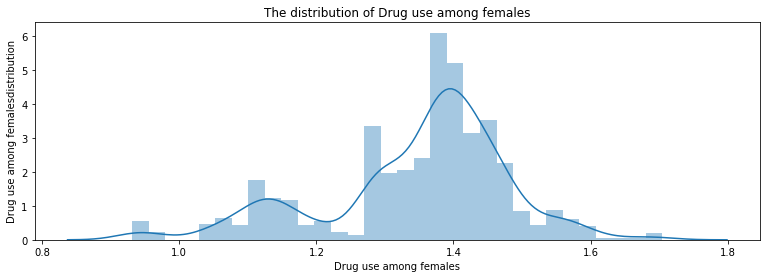

In [12]:
##Plotting a distribution of Drug use among Females.
distribution(Gender_drug_df, 'Drug use among females')
# There is some irregulality in the distribution

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


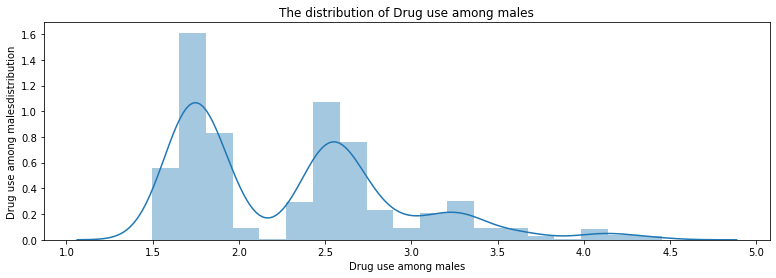

In [13]:
##Plotting a distribution of Drug use among Males.
distribution(Gender_drug_df, 'Drug use among males')

### Box plot to detect Outliers

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


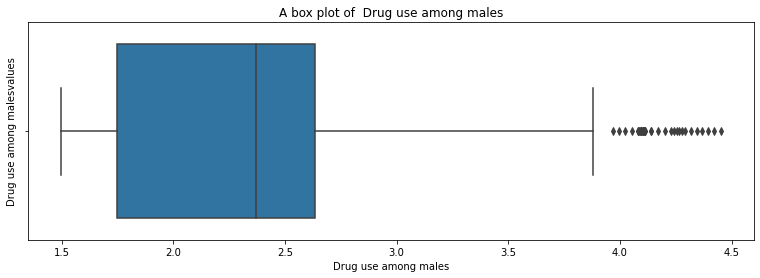

In [14]:
# A boxplot of the
boxplot(Gender_drug_df, 'Drug use among males')
# There are some point that are ahead of the 3rd quantile.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


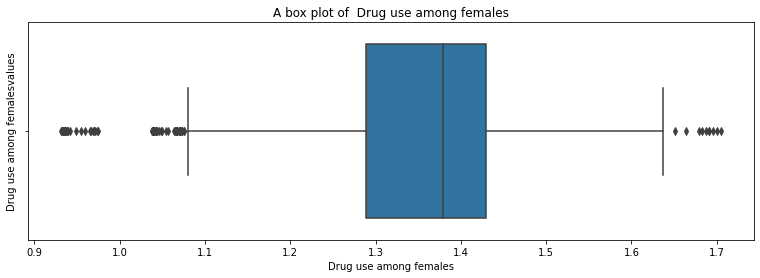

In [15]:
# A boxplot of drug use among females
boxplot(Gender_drug_df, 'Drug use among females')
# This data contained outliers below the 1st quantile

In [16]:
Gender_depression_df.head()

,Entity,Code,Year,%_Depressive_disorders_males,%_Depressive_disorders_females,Total_population
0,Algeria,DZA,1990,3.055564,4.392827,25758872.0
1,Algeria,DZA,1991,3.041834,4.378142,26400468.0
2,Algeria,DZA,1992,3.030887,4.366957,27028330.0
3,Algeria,DZA,1993,3.020667,4.353506,27635517.0
4,Algeria,DZA,1994,3.009850,4.346021,28213777.0


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


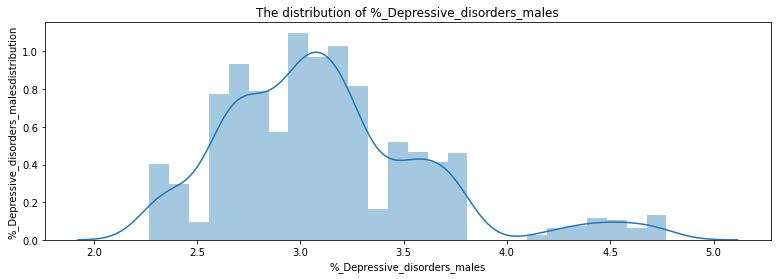

In [17]:
# Distribution of the gender with depression
Gender_depression_df
distribution(Gender_depression_df,'%_Depressive_disorders_males')
#It appears fairly normal.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


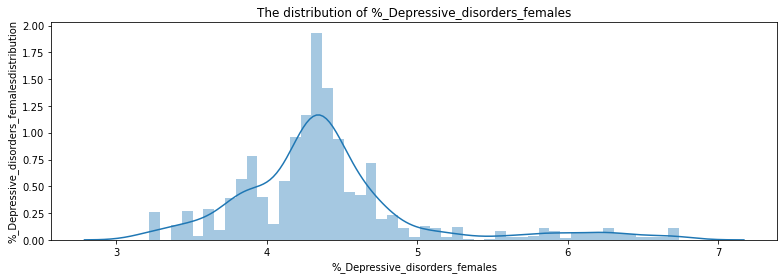

In [18]:
distribution(Gender_depression_df,'%_Depressive_disorders_females')
#The distriburion is fairly normal.

## b.) Bivariate Analysis

### Heat Map

In [19]:
# Checking in the numerical variables in order to correlate
numerical = Gender_depression_df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical_drugs = Gender_drug_df.select_dtypes(include=['int64','float64','Int64'])[:]

In [20]:
#Calculating correlation of the depressive disorders in males and females
correlation = numerical.corr()
correlation
#There is a weak coorelation between the gender use among males and females

,Year,%_Depressive_disorders_males,%_Depressive_disorders_females,Total_population
Year,1.000000,0.014618,-0.023401,0.136631
%_Depressive_disorders_males,0.014618,1.000000,0.679617,0.066589
%_Depressive_disorders_females,-0.023401,0.679617,1.000000,0.098008
Total_population,0.136631,0.066589,0.098008,1.000000


In [21]:
#Calculating correlation of the drug use in males and females
correlation_drugs = numerical_drugs.corr()
correlation_drugs

,Year,Drug use among males,Drug use among females
Year,1.000000,0.018231,0.040151
Drug use among males,0.018231,1.000000,0.199658
Drug use among females,0.040151,0.199658,1.000000


Text(0.5, 1.0, 'A correlation between the Percentage of depressive disorders')

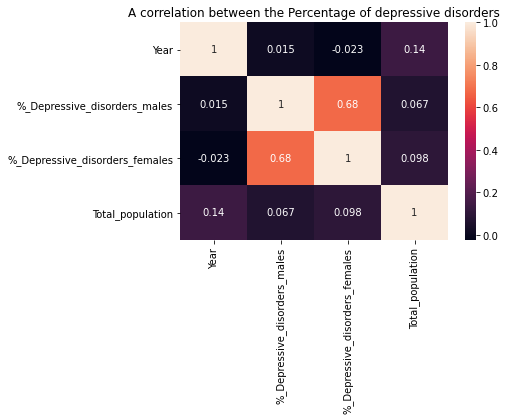

In [22]:
## Correlation heatmap of Depressive Disorders between males and females
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title('A correlation between the Percentage of depressive disorders')

Text(0.5, 1.0, 'A correlation between the drug use Males and Females')

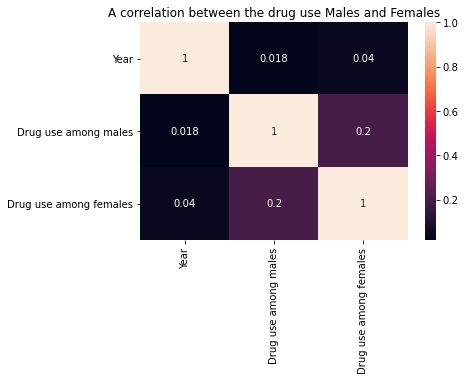

In [23]:
# Correlation heatmap of Drug use between Males and Females
sns.heatmap(correlation_drugs, xticklabels=correlation_drugs.columns, yticklabels=correlation_drugs.columns, annot=True)
plt.title('A correlation between the drug use Males and Females')
# There is a very week correlation meaning an increase in one leads to an infinticimally small increament in the other.

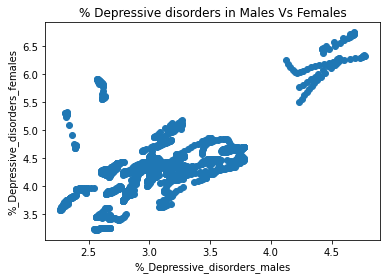

<Figure size 1080x504 with 0 Axes>

In [24]:
# Plotting a scatter plot for the relationship between the gender suffering depressive disorders.
scatterplot(Gender_depression_df,'%_Depressive_disorders_males','%_Depressive_disorders_females','% Depressive disorders in Males Vs Females')

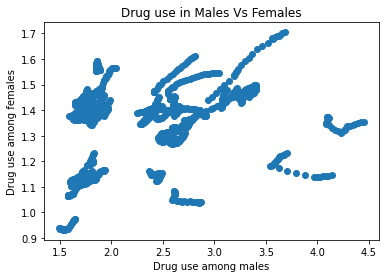

<Figure size 1080x504 with 0 Axes>

In [25]:
scatterplot(Gender_drug_df,'Drug use among males','Drug use among females','Drug use in Males Vs Females')
# The data is scattered around the dataset.

In [26]:
# Creating a new column with the exact number of Depressive Disorders in Males and Females.
Gender_depression_df['Depressive_disorder_males']=(Gender_depression_df['%_Depressive_disorders_males']/100)*Gender_depression_df['Total_population']
Gender_depression_df['Depressive_disorder_females']=(Gender_depression_df['%_Depressive_disorders_females']/100)*Gender_depression_df['Total_population']


## Pie Plot

## Which gender is most affected by depressive disorders generally?

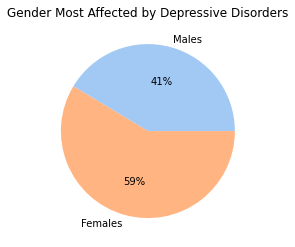

In [27]:
# Plotting a piechart to show which gender is more affected by Depressive disorders due to Drug Use
#define data
data = [Gender_depression_df['Depressive_disorder_males'].mean(), Gender_depression_df['Depressive_disorder_females'].mean()]
labels = ['Males', 'Females']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Gender Most Affected by Depressive Disorders')
plt.show()

#Therefore it is crystal clear that females suffer more from Depressive disorders than Males.

## Which gender is more involved in drug and substance use?

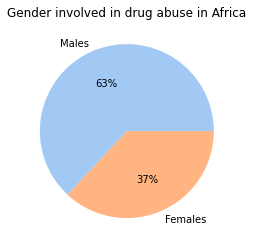

In [68]:
# Plotting a piechart to show which gender uses more drugs
#define data
data = [Gender_drug_df['Drug use among males'].mean(), Gender_drug_df['Drug use among females'].mean()]
labels = ['Males', 'Females']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Gender involved in drug abuse in Africa')
plt.show()
# It its therefore safe to note that the male gender is involved in drug abuse as compared to the female gender.

## Which country has the highest record of depressive disorders in Africa?

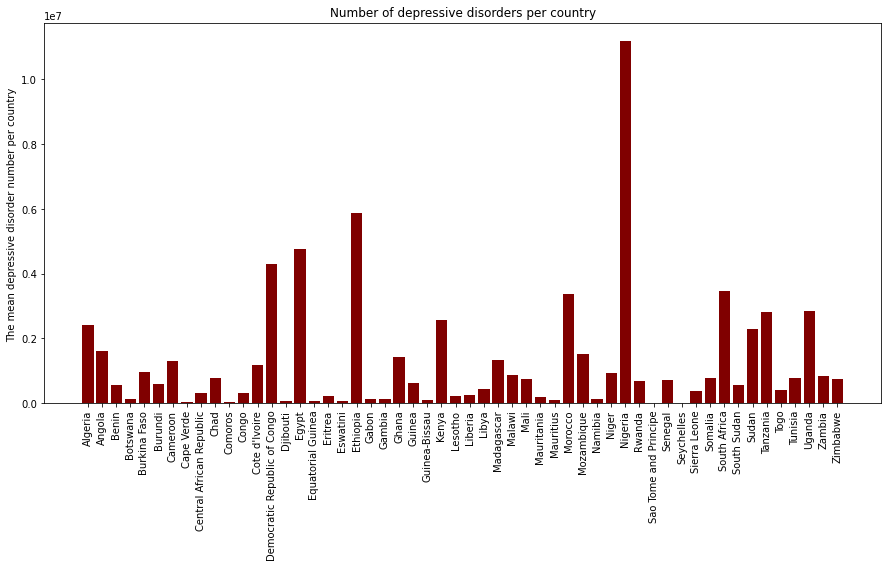

In [29]:
# Grouping by country and getting the sum
depression = Gender_depression_df.groupby('Entity').mean()
depression.columns
# Getting the Actual number of total number of depressive disorders per country.
depression['Total_Depressed']=depression['Depressive_disorder_males']+depression['Depressive_disorder_females']
depression.head()
df=pd.DataFrame(depression)
df1=df.reset_index()
df1
# Plotting the diagram with the country with the highest number of depressive disorders.
fig = plt.figure(figsize = (15, 7))
plt.bar(df1['Entity'], df1['Total_Depressed'], color ='maroon')
plt.xticks(rotation=90)
plt.ylabel('The mean depressive disorder number per country ')
plt.title('Number of depressive disorders per country')
plt.show()
# Nigeria has the highest number of depressive disorders.

## c.) Multivariate Analysis

## Answering the research questions

### Research question
* Which country has the highest record of depressive disorders in Africa?
* Which are the specific drugs and substances that are causing deaths in Africa?
* Which gender is most affected by depressive disorders generally?
* Which gender is more involved in drug and substance use?
* What are some of the prevalent mental illnesses cases in these countries?
* Which age bracket has the highest drug and substance use cases?
* What is the trend in drug and substance use as well as mental illnesses over the years?(Time series)
* Is there a correlation in drug and substance abuse with mental illnesses in africa?


## Which age bracket has the highest number of deaths due to drug and substance use cases in Africa?

Text(0, 0.5, 'Death rate per 100,000')

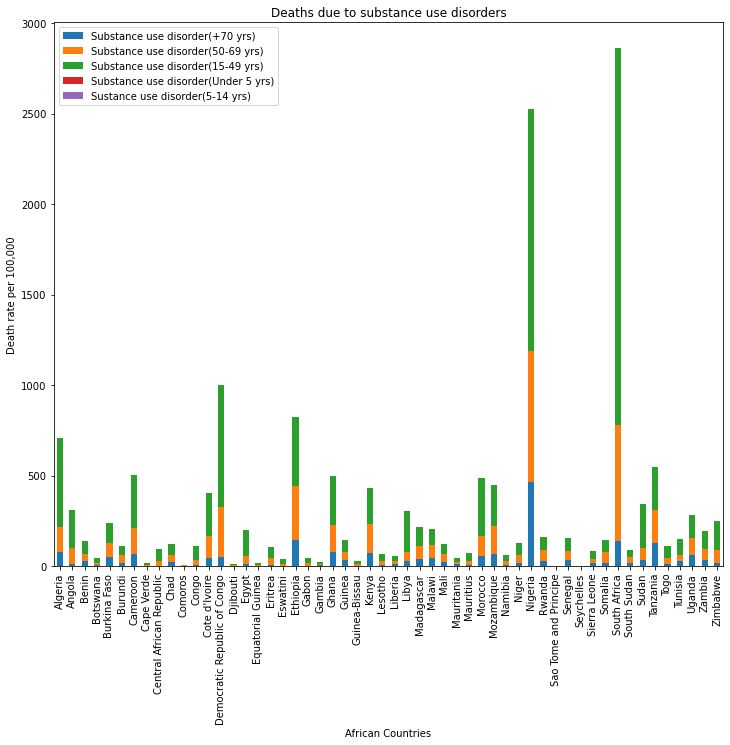

In [30]:
#Reading the dataset with age separated,illnesses and the drugs prevalent in africa
Final_df=dataframe('Clean datasets/final_merged.csv')
Final_df.head()
Grouped_Age=Final_df.iloc[:,:8].groupby(Final_df['Entity'])
df1=Grouped_Age.mean()
df2=df1.reset_index()
df2
# fig = plt.figure(figsize = (30, 30))
df2.plot(x='Entity', y=["Substance use disorder(+70 yrs)", 
"Substance use disorder(50-69 yrs)",
 "Substance use disorder(15-49 yrs)",
 "Substance use disorder(Under 5 yrs)",
 "Sustance use disorder(5-14 yrs)"],
 kind="bar",stacked=True,figsize = (12,10))
plt.title('Deaths due to substance use disorders')
plt.xlabel('African Countries')
plt.ylabel('Death rate per 100,000')


Text(0, 0.5, 'Death rate per 100,000')

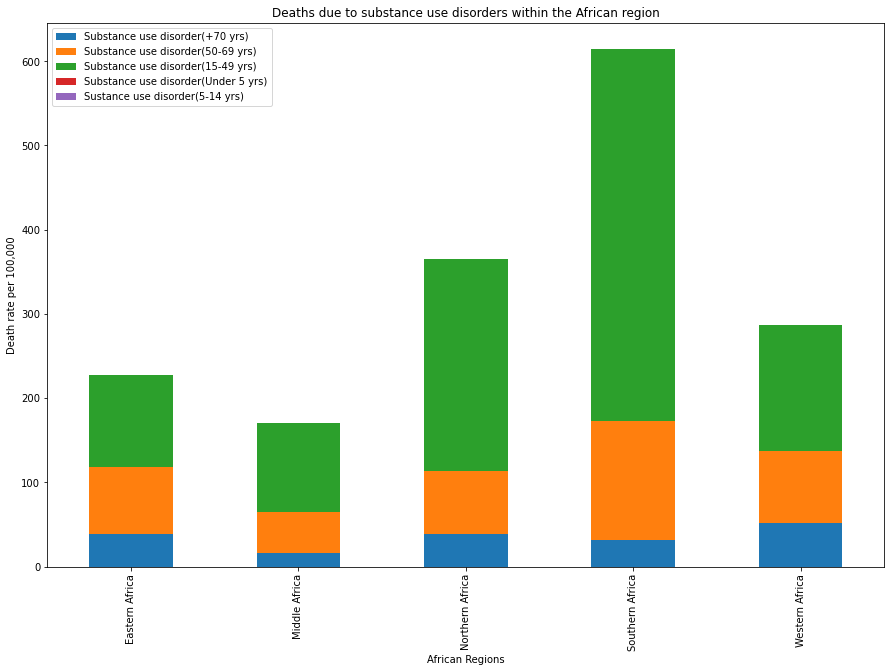

In [31]:
#Reading the dataset with the regions and merging it to the the dataset with age,mental illnesses and drugs used in africa.
region_merged=pd.merge(Final_df,African_region,left_on='Entity',right_on='country')
region_merged.columns
#Slicing the necessary dataset with the age brackets and grouping by region
Grouped_Age_region=region_merged.iloc[:,:8].groupby(region_merged['region'])
Grouped_Age_region
# Calculating the age means in all regions
df_Age_region=Grouped_Age_region.mean()
df_Age_region
#Reseting the index
df_Age1_region=df_Age_region.reset_index()
df_Age1_region
#Plotting the stacked chart
df_Age1_region.plot(x='region',y=["Substance use disorder(+70 yrs)", 
"Substance use disorder(50-69 yrs)", 
"Substance use disorder(15-49 yrs)",
"Substance use disorder(Under 5 yrs)",
"Sustance use disorder(5-14 yrs)"], 
kind="bar",stacked=True,figsize = (15, 10))
plt.title('Deaths due to substance use disorders within the African region')
plt.xlabel('African Regions')
plt.ylabel('Death rate per 100,000')


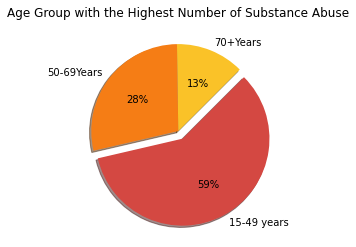

In [32]:
#define data
data = [Final_df['Substance use disorder(+70 yrs)'].mean(),Final_df['Substance use disorder(50-69 yrs)'].mean(),Final_df['Substance use disorder(15-49 yrs)'].mean()]
labels = ['70+Years', '50-69Years', '15-49 years']

# define Seaborn color palette to use
colors = sns.color_palette('inferno_r')[0:4]
explode = (0, 0, 0.1)
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',explode=explode,shadow=True, startangle=45)
plt.title('Age Group with the Highest Number of Substance Abuse')
plt.show()

### The Age (15-49 Yrs) was most affected by Substance use disorders
### Southern Africa had the highest number of deaths due to substance use disorders

##  Which are the drugs and substances that caused deaths in Africa?

Text(0, 0.5, 'Death rate per 100,000')

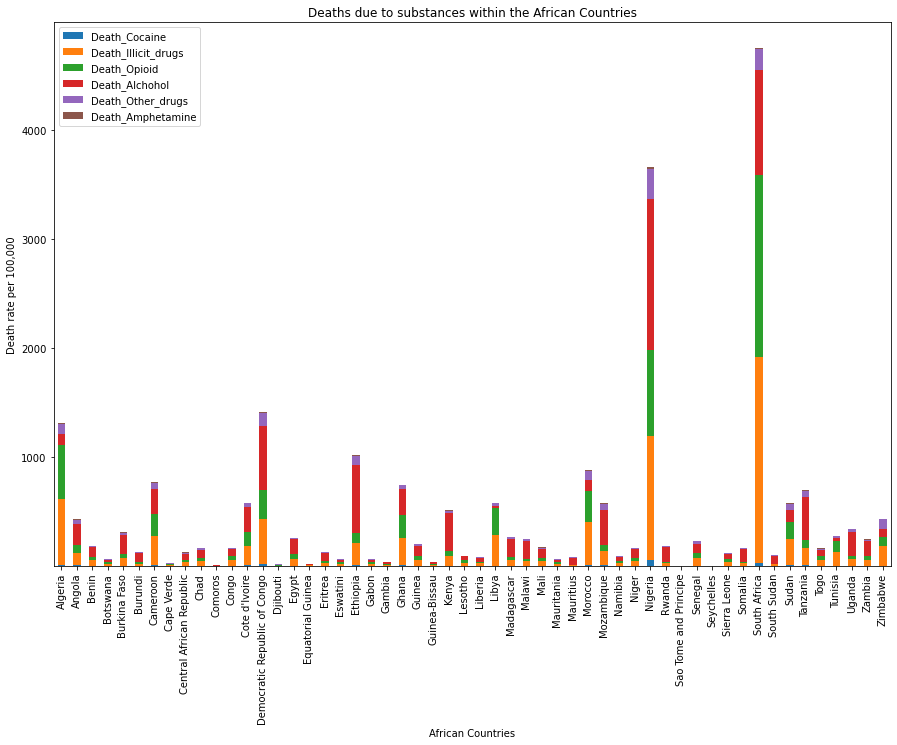

In [33]:
#Reading the dataset with age separated,illnesses and the drugs prevalent in africa
Final_df=dataframe('Clean datasets/final_merged.csv')
Final_df.columns
Grouped_Drug=Final_df.iloc[:,8:14].groupby(Final_df['Entity'])
Grouped_Drug
df_Drug=Grouped_Drug.mean()
df_Drug
df_Drug1=df_Drug.reset_index()
df_Drug1
# # fig = plt.figure(figsize = (30, 30))
df_Drug1.plot(x='Entity', y=['Death_Cocaine','Death_Illicit_drugs', 'Death_Opioid', 'Death_Alchohol',
        'Death_Other_drugs', 'Death_Amphetamine'], kind="bar",stacked=True,figsize = (15, 10))
plt.title('Deaths due to substances within the African Countries')
plt.xlabel('African Countries')
plt.ylabel('Death rate per 100,000')

Text(0, 0.5, 'Death rate per 100,000')

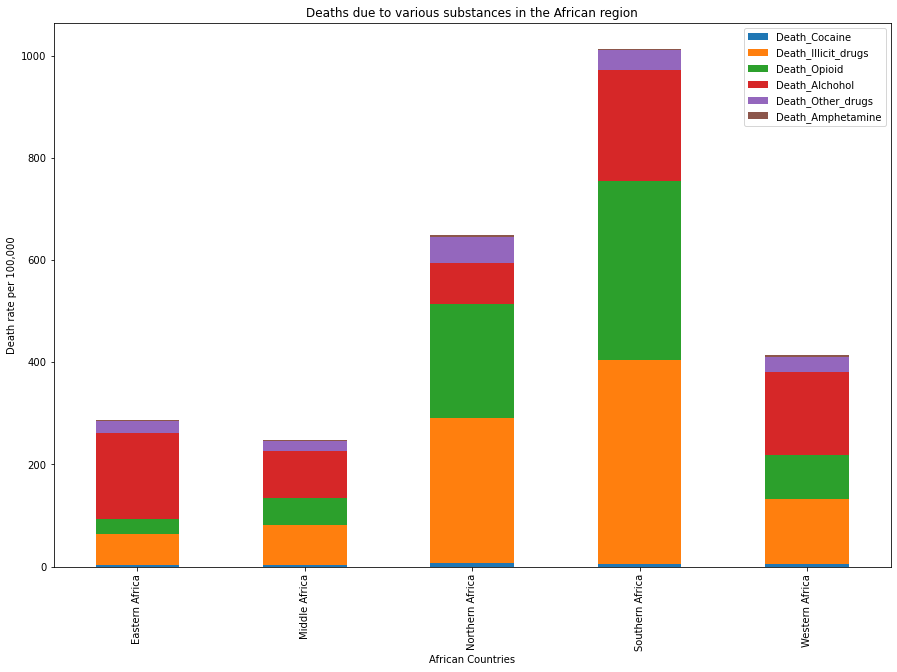

In [34]:
#Merging the consolidated dataframe with regions for grouping.
region_merged=pd.merge(Final_df,African_region,left_on='Entity',right_on='country')
region_merged.columns
#Selecting the drug types within the dataset
Grouped_Drug_region=region_merged.iloc[:,8:14].groupby(region_merged['region'])
# Computing the mean of the grouped dataset
df_Drug_region=Grouped_Drug_region.mean()
#Reseting the index
df_Drug1_region=df_Drug_region.reset_index()
df_Drug1_region
#Plotting the data.
df_Drug1_region.plot(x='region', y=['Death_Cocaine','Death_Illicit_drugs', 'Death_Opioid', 'Death_Alchohol',
        'Death_Other_drugs', 'Death_Amphetamine'].sort(), kind="bar",stacked=True,figsize = (15, 10))
plt.title('Deaths due to various substances in the African region')
plt.xlabel('African Countries')
plt.ylabel('Death rate per 100,000')

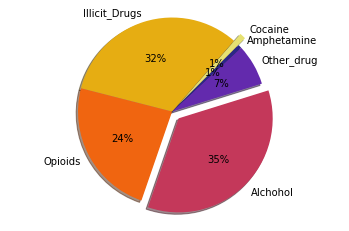

In [35]:
#define data
data = [Final_df['Death_Cocaine'].mean(),Final_df['Death_Illicit_drugs'].mean(),Final_df['Death_Opioid'].mean(),Final_df['Death_Alchohol'].mean(),Final_df['Death_Other_drugs'].mean(),Final_df['Death_Amphetamine'].mean()]
labels = ['Cocaine','Illicit_Drugs', 'Opioids','Alchohol','Other_drug','Amphetamine']

# define Seaborn color palette to use
colors = sns.color_palette('CMRmap_r')[0:8]
explode = (0.1, 0, 0, 0.1, 0, 0)
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',explode=explode,shadow=True, startangle=45)
plt.axis('equal')
plt.show()

### Illicit Drugs take the lead in Northern and Southern African Region.
### Alchohol is seen to be mostly abused in East and West African Region.
### Opiod is fairly popular within the regions
### Amphetamine and Cocaine is NOT popular among the African regions

##  What are the prevalent mental Illnesses within the African Region

Text(0, 0.5, 'Mental illnesses cases')

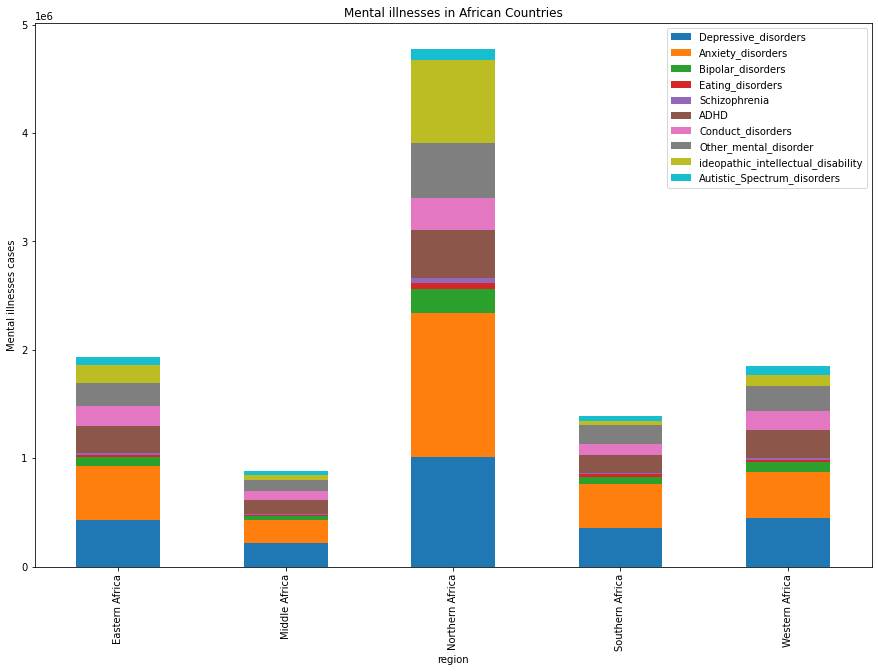

In [36]:
#Merging the dataset.
# region_merged=pd.merge(Final_df,African_region,left_on='Entity',right_on='country')
region_merged.columns
# Final_df.columns
Grouped_Mental_region=region_merged.iloc[:,14:24].groupby(region_merged['region'])
Grouped_Mental_region
df_Mental_region=Grouped_Mental_region.mean()
df_Mental_region
df_Mental1_region=df_Mental_region.reset_index()
df_Mental1_region
df_Mental1_region.plot(x='region', y=['Depressive_disorders',
       'Anxiety_disorders', 'Bipolar_disorders', 'Eating_disorders',
       'Schizophrenia', 'ADHD', 'Conduct_disorders', 'Other_mental_disorder',
       'ideopathic_intellectual_disability', 'Autistic_Spectrum_disorders'].sort(), 
       kind="bar",stacked=True,figsize = (15, 10))
plt.title('Mental illnesses in African Countries')
plt.ylabel('Mental illnesses cases')


## Hypothesis testing on depressive disorders

## Ho:There is no significant difference in the depressive disorders between the males and the females
## H1:There is a statistically significant difference in the depressive disorders between the males and the females

### Normality


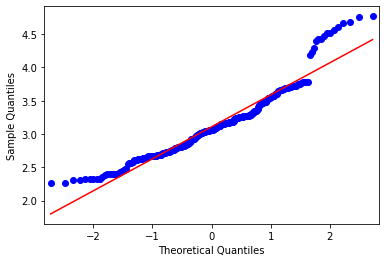

In [37]:
#Loading the gender differentiated dataset for disorders
Gender_depression_df=dataframe('Clean datasets/Clean_Gender_depression2.csv')
Gender_depression_df
# Inputting new columns with the actual number of gender with depressive disorders.
Gender_depression_df['Depressive_disorder_males']=(Gender_depression_df['%_Depressive_disorders_males']/100)*Gender_depression_df['Total_population']
Gender_depression_df['Depressive_disorder_females']=(Gender_depression_df['%_Depressive_disorders_females']/100)*Gender_depression_df['Total_population']
Gender_depression_df1 = Gender_depression_df.drop(columns='Unnamed: 0')
# #Setting country as index
# final_gender_merged.set_index('Entity', inplace=True)
# final_gender_merged
# Sampling of specific columns to enable normality test
Gender_depression_df1.shape
missing_percentage(Gender_depression_df1)
# final_gender_merged.isnull().sum()
Sample_df=Gender_depression_df1.sample(n=307)
Sample_df
# # Checking for normality of my dataset(Q-plot)
normality(Sample_df,'%_Depressive_disorders_males')
# Using a dist plot
# distribution(Sample_df,'%_Depressive_disorders_males') 
# The data is somewhat normaly distributed except in the extreemes where there seem to be outliers in our dataset

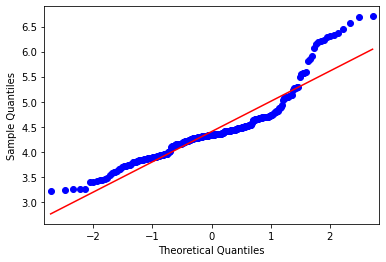

In [38]:
#Checking the normality of the depressive disorder dataset.
normality(Sample_df,'%_Depressive_disorders_females')
# distribution(Sample_df,'%_Depressive_disorders_females')

### The distribution of proportions is ready for analysis

### Test=Ztest for two independet groups

In [39]:
#Drug use sample
Sample_df
#Picking my independent groups
Males_depressed=Sample_df['Depressive_disorder_males']
Females_depressed=Sample_df['Depressive_disorder_females']
# # Checking the distribution of mean,standard deviastion and the sample size for the two parameters we intend to comapre
Gender_1, Gender_2 = Males_depressed.mean(),Females_depressed.mean()
sd1, sd2 = Males_depressed.std(),Females_depressed.std()
n1, n2 = Males_depressed.shape[0],Females_depressed.shape[0]
# It is important to note that the values are discrete..
z, p = Z_test(Gender_1,Gender_2, sd1, sd2, n1, n2)

z_score = np.round(z,8)
print('The z score is',z_score)
p_val = np.round(p,6)
print('The p_value is',p_val)
alpha_level=0.05
if (p_val<alpha_level):
    print('Reject Null Hypothesis : There is a Significant difference in depressive disorders in men and women across the continent')
else:
  print('Do not reject Null Hypothesis : There is NO Significant difference in depressive disorders among men and women across the continent')

The z score is -2.83045913
The p_value is 0.004648
Reject Null Hypothesis : There is a Significant difference in depressive disorders in men and women across the continent


## Hypothesis testing on drug use

## Ho:There is no significant difference in the prevalence of drug use between the males and the females
## H1:There is a statistically significant difference in the prevalent drug use between the males and the females

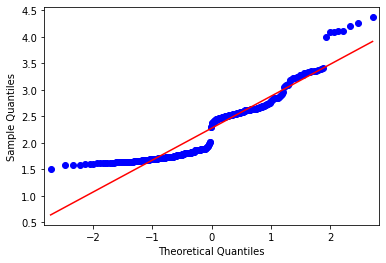

In [40]:
#Loading the gender differentiated dataset for disorders
Gender_drug_df=dataframe('Clean datasets/Clean_gender_drug_df2.csv')
Gender_drug_df
Gender_drug_df1 = Gender_drug_df.drop(columns='Unnamed: 0')
Gender_drug_df1
# #Setting country as index
# final_gender_merged.set_index('Entity', inplace=True)
# final_gender_merged
# Sampling of specific columns to enable normality test
Gender_drug_df1.shape
# missing_percentage(Gender_depression_df1)
# # final_gender_merged.isnull().sum()
Sample_df1=Gender_drug_df1.sample(n=305)
Sample_df1
# Checking for normality of my dataset(Q-plot)
normality(Sample_df1,'Drug use among males')
# normality(Sample_df1,'Drug use among females')
# distribution(Sample_df1,'Drug use among males')

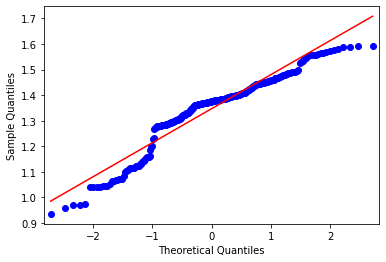

In [41]:
normality(Sample_df1,'Drug use among females')
# distribution(Sample_df1,'Drug use among females')
#The dataset is fairly normal

### The data sampled is normally disributed and ready for hypothesis testing

### b.) Hypothesis two

In [42]:
#Drug use sample
Sample_df1
#Picking my independent groups
Males_drugs=Sample_df1['Drug use among males']
Females_drugs=Sample_df1['Drug use among females']
# # Checking the distribution of mean,standard deviastion and the sample size for the two parameters we intend to comapre
Loc_1, Loc_2 = Males_drugs.mean(),Females_drugs.mean()
sd1, sd2 = Males_drugs.std(),Females_drugs.std()
n1, n2 = Males_drugs.shape[0],Females_drugs.shape[0]
# It is important to note that the values are discrete..
z, p = Z_test(Loc_1, Loc_2, sd1, sd2, n1, n2)

z_score = np.round(z,8)
print('The z score is',z_score)
p_val = np.round(p,6)
print('The p_value is',p_val)
alpha_level=0.05
if (p_val<alpha_level):
    print('Reject Null Hypothesis : There is a Significant difference in drug use in men and women across the continent')
else:
  print('Do not reject Null Hypothesis : There is NO Significant difference in drug use among men and women across the continent')

The z score is 26.34049647
The p_value is 0.0
Reject Null Hypothesis : There is a Significant difference in drug use in men and women across the continent


## Correlation between drug and substance abuse and mental illneses in Africa

## Ho: There is NO significant relationship between the deaths due to drug use and depressive disorders in Africa
## H1: There is a statistically significant relationship between the deaths due to drug use and depressive disorders in Africa

In [63]:
# Grouping by country and getting the sum
depression = Gender_depression_df.groupby('Entity').mean()
depression.columns
# Getting the Actual number of total number of depressive disorders per country.
depression['Total_Depressed']=depression['Depressive_disorder_males']+depression['Depressive_disorder_females']
depression.head()
df=pd.DataFrame(depression)
df1=df.reset_index()
df1
# Gender separated drug use
# Grouping by country and getting the sum
drugs = Gender_drug_df.groupby('Entity').mean()
drugs.columns
# # Getting the total deaths due to substance abuse.
drugs['Total_drugs']=drugs['Drug use among males']+drugs['Drug use among females']
drugs.head()
df_drug=pd.DataFrame(drugs)
df1_drug=df_drug.reset_index()
df1_drug
# Testing the correlation between substace abuse and depressive disorders
import scipy.stats as stats
pearsons,pvalue=stats.pearsonr(df1_drug['Total_drugs'],df1['Total_Depressed'])
print(pearsons,pvalue)
alpha=0.05
if pvalue<alpha:
    print("Reject the null hypothesis:There is a significant relationship between deaths due to drug use and depressive disorders")
else:
    print("Fail to reject the null hypothesis:There is NO significant relationship between deaths due to drug use and depressive disorders")
# There's a very weak corelation between the drug use death case and the depressive disorders in Africa
#  


-0.1256096298101921 0.36544836821872995
Fail to reject the null hypothesis:There is NO significant relationship between deaths due to drug use and depressive disorders


# Time Series

In [44]:
#reading the data from csv file, changing the year column into date time and making it the index.
df_time= pd.read_csv('Clean datasets/Region_merged.csv', parse_dates=['Year'])
df_time.head()

,Unnamed: 0,Entity,Code,Year,Substance use disorder(+70 yrs),Substance use disorder(50-69 yrs),Substance use disorder(15-49 yrs),Substance use disorder(Under 5 yrs),Sustance use disorder(5-14 yrs),Death_Cocaine,...,Bipolar_disorders,Eating_disorders,Schizophrenia,ADHD,Conduct_disorders,Other_mental_disorder,ideopathic_intellectual_disability,Autistic_Spectrum_disorders,country,region
0,0,Algeria,DZA,1990-01-01,29.228376,57.010318,198.782354,0.0,0.0,4.748688,...,167109.048534,45314.330944,34144.870694,321138.811673,286496.027151,356194.769628,436260.063074,88428.266328,Algeria,Northern Africa
1,1,Algeria,DZA,1991-01-01,31.480193,59.925538,214.634182,0.0,0.0,5.048505,...,172962.912822,46454.489839,35380.945910,330633.206286,294439.857587,369577.670959,453157.453569,90734.813564,Algeria,Northern Africa
2,2,Algeria,DZA,1992-01-01,33.800576,63.346701,233.077626,0.0,0.0,5.405902,...,178946.231166,47636.007696,36646.930910,339968.267058,302273.026515,383173.239231,469229.532850,92984.227517,Algeria,Northern Africa
3,3,Algeria,DZA,1993-01-01,36.136963,67.339998,253.957402,0.0,0.0,5.809889,...,185081.732750,48991.139844,37953.800962,349072.117645,309875.085430,397026.661732,484072.303679,95164.282428,Algeria,Northern Africa
4,4,Algeria,DZA,1994-01-01,38.422563,70.230134,284.434950,0.0,0.0,6.321724,...,191356.654128,50333.457322,39302.924501,357847.520639,317126.962255,411135.399846,497283.554927,97265.874095,Algeria,Northern Africa


## The trend of drug abuse among various age groups in the African region

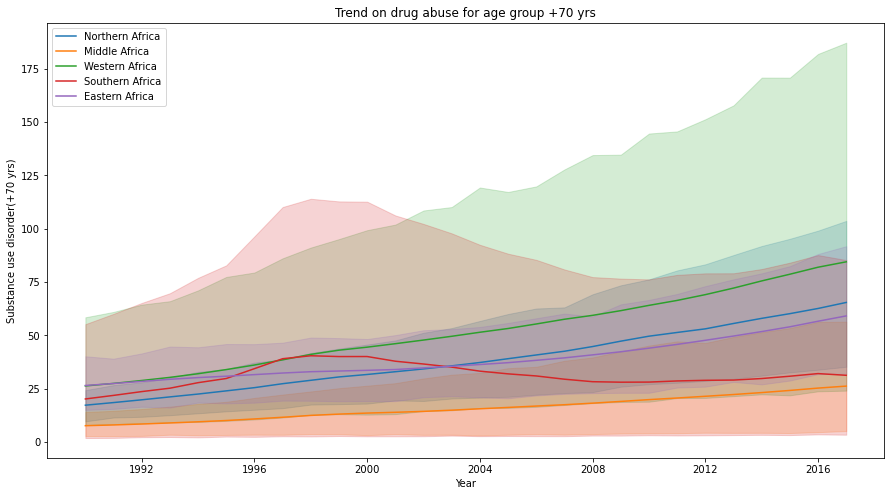

In [45]:
#Plotting the trend on drug abuse for age group +70yrs
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Substance use disorder(+70 yrs)",hue='region',data=df_time).set(title="Trend on drug abuse for age group +70 yrs")
plt.legend(loc='upper left')

[Text(0.5, 1.0, 'Trend on drug abuse for age group 15-49yrs')]

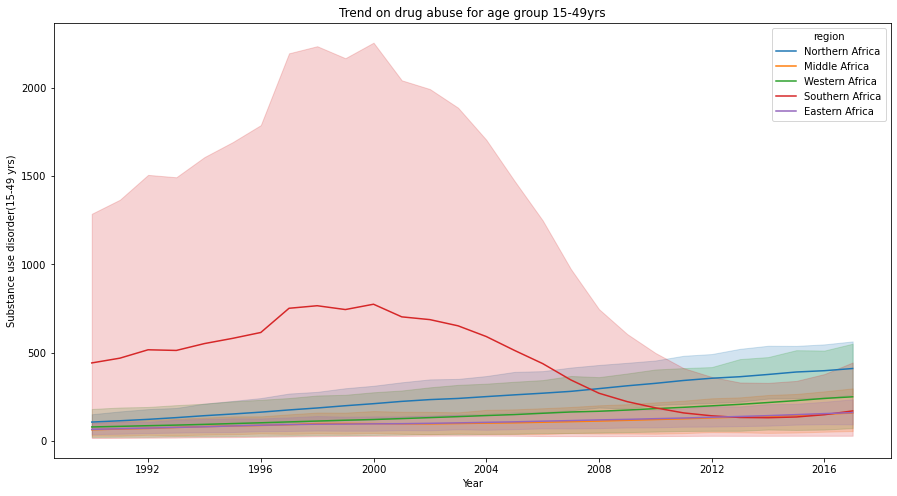

In [46]:
# Substance use disorder(15-49 yrs)']
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Substance use disorder(15-49 yrs)",hue='region',data=df_time).set(title="Trend on drug abuse for age group 15-49yrs")

[Text(0.5, 1.0, 'Trend on drug abuse for age group 50-69')]

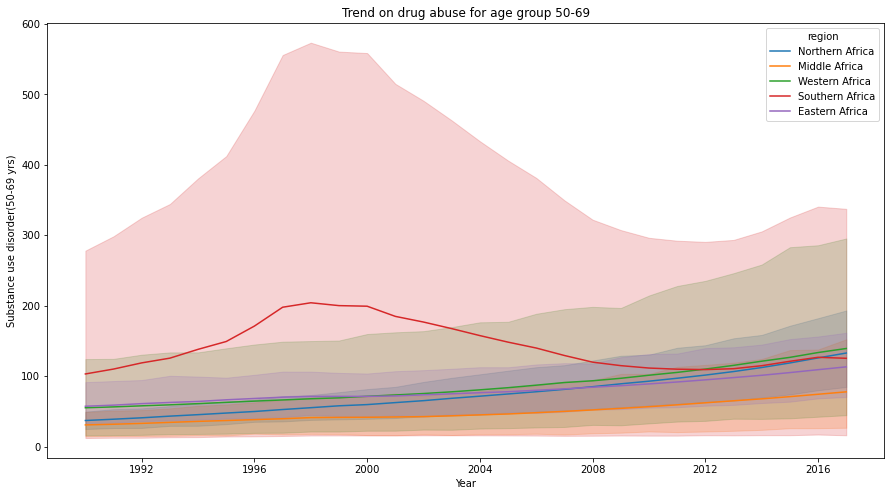

In [47]:
# Substance use disorder(50-69 yrs)']
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Substance use disorder(50-69 yrs)",hue='region',data=df_time).set(title="Trend on drug abuse for age group 50-69")

## Trend of Mental Illnesses in African regions

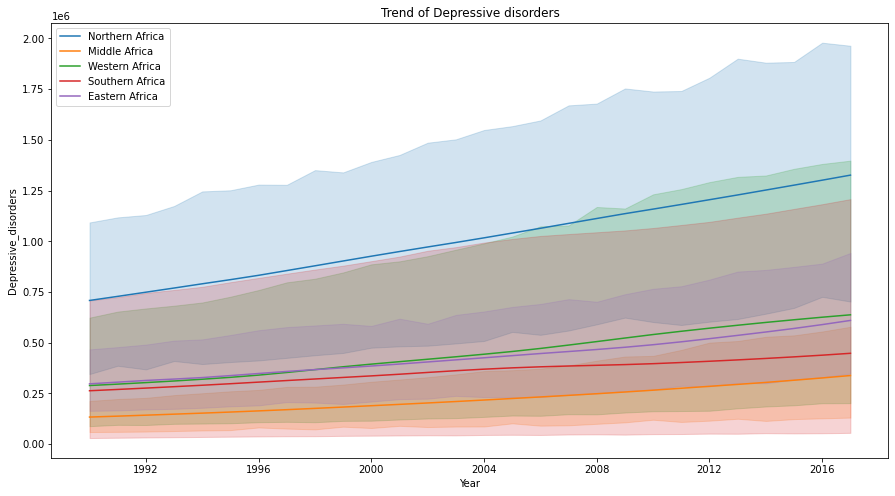

In [48]:
# timeline of Depressive dissorders per region in Africa since 1990 to 2017 
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Depressive_disorders',hue='region',data=df_time).set(title="Trend of Depressive disorders")
plt.legend(loc='upper left')

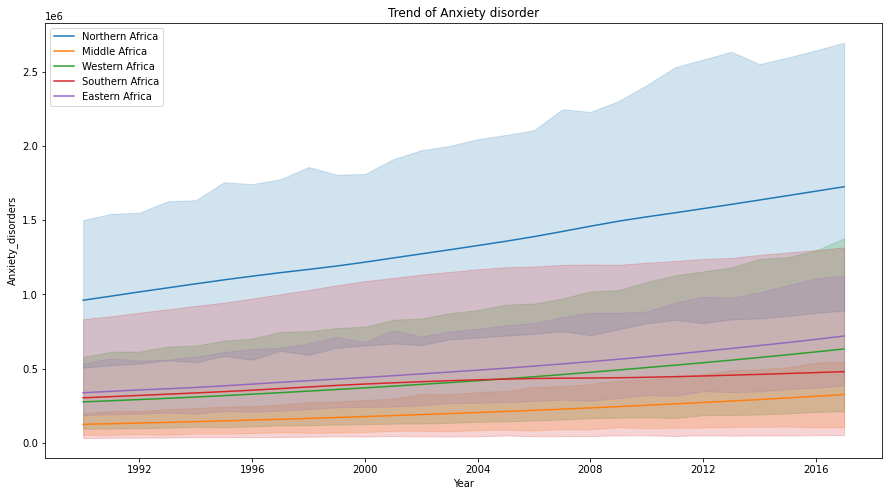

In [49]:
# timeline of Anxiety dissorders per region in Africa since 1990 to 2017 
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Anxiety_disorders',hue='region',data=df_time).set(title="Trend of Anxiety disorder")
plt.legend(loc='upper left')

## Trend of the drugs being abused in the African regions

[Text(0.5, 1.0, 'Trend of Illicit drug deaths')]

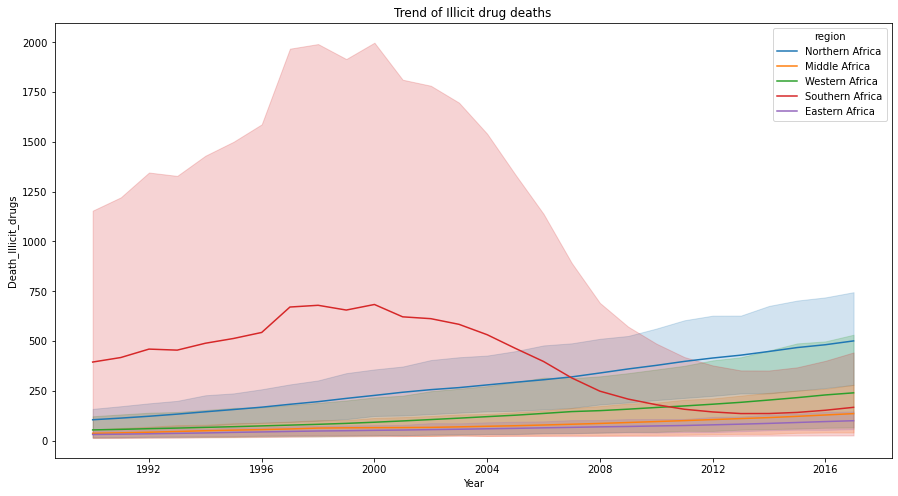

In [50]:
# Substance use illicit drug
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Death_Illicit_drugs",hue='region',data=df_time).set(title="Trend of Illicit drug deaths")

[Text(0.5, 1.0, 'Trend of Alchohol deaths')]

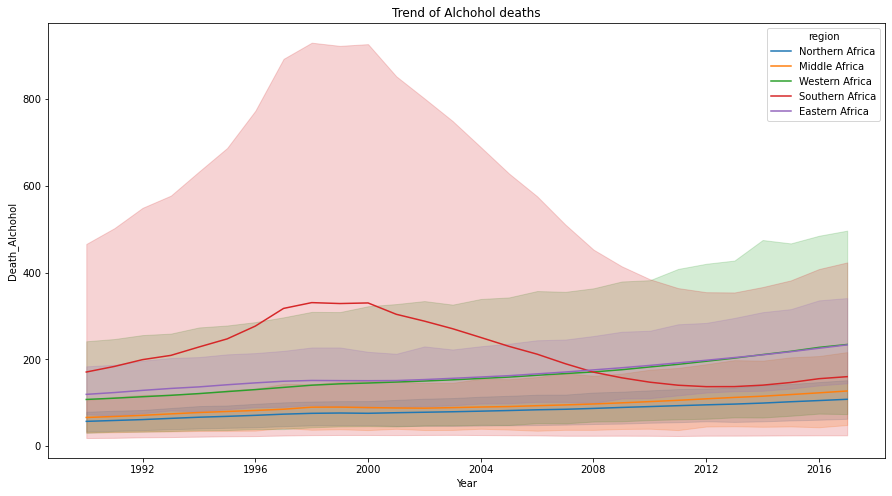

In [51]:
# Substance use alchohol
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Death_Alchohol",hue='region',data=df_time).set(title="Trend of Alchohol deaths")

[Text(0.5, 1.0, 'Trend of Opioid deaths')]

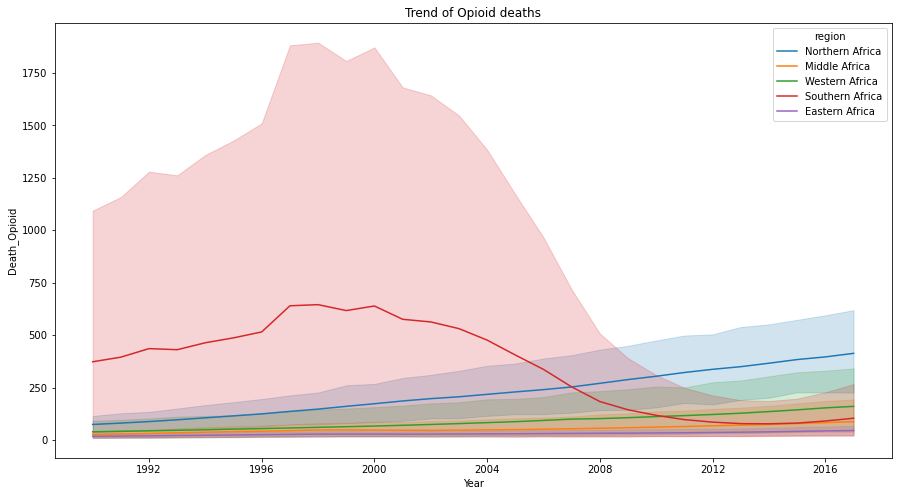

In [52]:
# Regional trend per year for deaths by Opioid
plt.figure(figsize=(15,8))
sns.lineplot(x = "Year", y = "Death_Opioid",hue='region',data=df_time).set(title="Trend of Opioid deaths")

## Timeline on Kenya

In [53]:
# reading the dataset for individual countries
df_another_time= pd.read_csv('Clean datasets/Region_merged.csv', parse_dates=['Year'], index_col='Year')

In [54]:
# selecting a country to see the trend over the years
df_country=df_another_time[(df_another_time.Entity=='Kenya')]
df_country.head()

,Unnamed: 0,Entity,Code,Substance use disorder(+70 yrs),Substance use disorder(50-69 yrs),Substance use disorder(15-49 yrs),Substance use disorder(Under 5 yrs),Sustance use disorder(5-14 yrs),Death_Cocaine,Death_Illicit_drugs,...,Bipolar_disorders,Eating_disorders,Schizophrenia,ADHD,Conduct_disorders,Other_mental_disorder,ideopathic_intellectual_disability,Autistic_Spectrum_disorders,country,region
Year,,,,,,,,,,,,,,,,,,,,,
1990-01-01,644,Kenya,KEN,42.692217,75.834432,84.302394,0.0,0.0,0.890267,27.231593,...,113913.813574,26336.173799,24112.999303,368294.508036,279613.281658,267749.280963,158457.166151,107009.024766,Kenya,Eastern Africa
1991-01-01,645,Kenya,KEN,44.445168,80.066222,89.958427,0.0,0.0,0.968286,29.628080,...,118169.588883,27277.431162,25025.674969,381166.828185,289677.747561,277582.562666,163672.378553,110262.160315,Kenya,Eastern Africa
1992-01-01,646,Kenya,KEN,46.446876,84.954073,96.471492,0.0,0.0,1.059231,32.424900,...,122563.226159,28275.504473,25966.915751,394222.962779,299812.477914,287768.032903,168871.421329,113552.864122,Kenya,Eastern Africa
1993-01-01,647,Kenya,KEN,48.573270,90.172900,103.110219,0.0,0.0,1.156853,35.411121,...,127114.019941,29281.683174,26942.374595,407256.236671,309676.580330,298390.682049,173950.064955,116859.746281,Kenya,Eastern Africa
1994-01-01,648,Kenya,KEN,50.769874,95.503872,110.094485,0.0,0.0,1.262531,38.599988,...,131825.760999,30365.670787,27948.255866,420227.611040,319348.203320,309410.200435,178830.485602,120186.406443,Kenya,Eastern Africa


<AxesSubplot:title={'center':'Timeline one drug use per age group'}, xlabel='Year'>

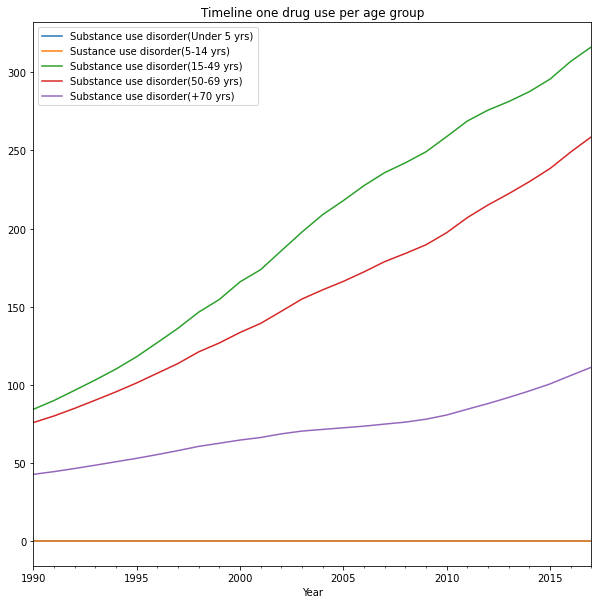

In [55]:
# timeline comparison on the age groups over the years
df_country[['Substance use disorder(Under 5 yrs)','Sustance use disorder(5-14 yrs)','Substance use disorder(15-49 yrs)',
            'Substance use disorder(50-69 yrs)','Substance use disorder(+70 yrs)']].plot(figsize=(10,10),title='Timeline one drug use per age group')

<AxesSubplot:title={'center':'Timeline of death cases by drug in Kenya'}, xlabel='Year'>

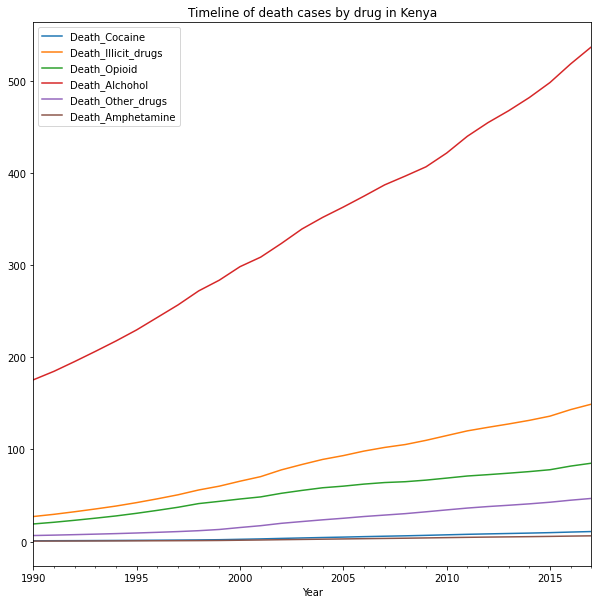

In [56]:
# timeline of the trend of the drugs over the years
df_country[['Death_Cocaine','Death_Illicit_drugs','Death_Opioid',
            'Death_Alchohol','Death_Other_drugs','Death_Amphetamine']].plot(figsize=(10,10),title='Timeline of death cases by drug in Kenya')

<AxesSubplot:title={'center':'Timeline of mental disorders in kenya'}, xlabel='Year'>

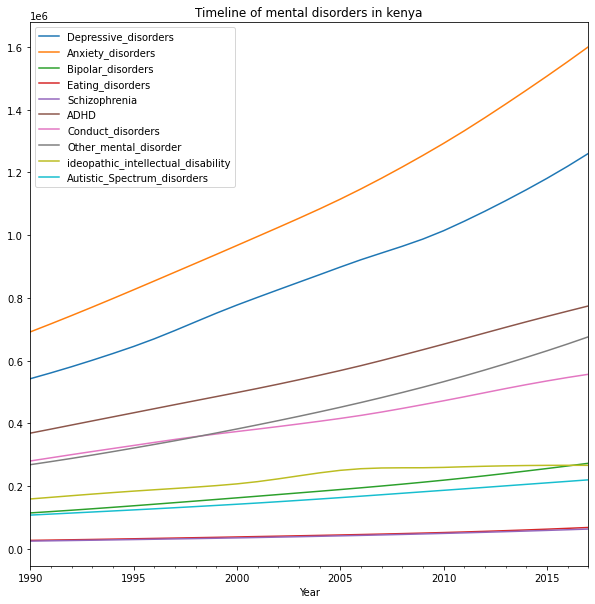

In [57]:
# timeline on the trend of mental illnesses per illness over time
df_country[['Depressive_disorders','Anxiety_disorders',
            'Bipolar_disorders','Eating_disorders','Schizophrenia','ADHD',
            'Conduct_disorders','Other_mental_disorder',
            'ideopathic_intellectual_disability','Autistic_Spectrum_disorders']].plot(figsize=(10,10),title='Timeline of mental disorders in kenya')

## Forecasting the deathrates due to alchohol abuse in Kenya